In [23]:
import pandas as pd
import numpy as np
import openpyxl
import matplotlib.pyplot as plt
print(f"{pd.__version__}")

1.5.3


In [30]:
np.random.seed(1)
n = 100
dates = pd.date_range(start='2045-01-01', periods=n, freq='D')
products = ['Tablet', 'Camera', 'Phone', 'Microphone', 'Table']
prices = np.round(np.random.uniform(50, 200, n), 2)
quantiles = np.random.randint(1, 15, n)

data = {
    'Date': dates,
    'Product': np.random.choice(products, n),
    'Price': prices,
    'Quantity': quantiles
}

df = pd.DataFrame(data)

In [31]:
df.head()

,Date,Product,Price,Quantity
0,2045-01-01,Microphone,112.55,5
1,2045-01-02,Microphone,158.05,7
2,2045-01-03,Table,50.02,1
3,2045-01-04,Microphone,95.35,7
4,2045-01-05,Phone,72.01,6


In [32]:
df.dtypes

Date        datetime64[ns]
Product             object
Price              float64
Quantity             int32
dtype: object

In [33]:
df.to_csv('random_sales.csv', index=False)

In [34]:
file_path = 'random_sales.csv'
df = pd.read_csv(file_path, parse_dates=['Date'], date_parser=lambda x: pd.to_datetime(x, format='%Y-%m-%d'))
df.head()

,Date,Product,Price,Quantity
0,2045-01-01,Microphone,112.55,5
1,2045-01-02,Microphone,158.05,7
2,2045-01-03,Table,50.02,1
3,2045-01-04,Microphone,95.35,7
4,2045-01-05,Phone,72.01,6


In [35]:
df.dtypes

Date        datetime64[ns]
Product             object
Price              float64
Quantity             int64
dtype: object

In [36]:
df.to_excel('sales_data.xlsx')

In [37]:
df.to_json('sales_data.json')

# **Analyzing CSV - Loaded DataFrames**

In [38]:
df.shape

(100, 4)

In [39]:
df.describe()

,Price,Quantity
count,100.000000,100.000000
mean,122.881300,7.510000
std,44.382936,4.314633
min,50.020000,1.000000
25%,81.472500,4.000000
50%,120.615000,7.000000
75%,158.262500,11.250000
max,198.330000,14.000000


In [40]:
df.values

array([[Timestamp('2045-01-01 00:00:00'), 'Microphone', 112.55, 5],
       [Timestamp('2045-01-02 00:00:00'), 'Microphone', 158.05, 7],
       [Timestamp('2045-01-03 00:00:00'), 'Table', 50.02, 1],
       [Timestamp('2045-01-04 00:00:00'), 'Microphone', 95.35, 7],
       [Timestamp('2045-01-05 00:00:00'), 'Phone', 72.01, 6],
       [Timestamp('2045-01-06 00:00:00'), 'Table', 63.85, 14],
       [Timestamp('2045-01-07 00:00:00'), 'Table', 77.94, 2],
       [Timestamp('2045-01-08 00:00:00'), 'Tablet', 101.83, 3],
       [Timestamp('2045-01-09 00:00:00'), 'Microphone', 109.52, 2],
       [Timestamp('2045-01-10 00:00:00'), 'Microphone', 130.82, 6],
       [Timestamp('2045-01-11 00:00:00'), 'Tablet', 112.88, 5],
       [Timestamp('2045-01-12 00:00:00'), 'Microphone', 152.78, 11],
       [Timestamp('2045-01-13 00:00:00'), 'Camera', 80.67, 1],
       [Timestamp('2045-01-14 00:00:00'), 'Tablet', 181.72, 8],
       [Timestamp('2045-01-15 00:00:00'), 'Phone', 54.11, 14],
       [Timestamp('2045-0

# **Grouping Data in DataFrames**

In [41]:
product_sales = df.groupby('Product')['Quantity'].sum()
product_sales

Product
Camera        103
Microphone    143
Phone         169
Table         197
Tablet        139
Name: Quantity, dtype: int64

In [42]:
type(product_sales)

pandas.core.series.Series

In [43]:
average_price = df.groupby('Product')['Price'].mean()
average_price

Product
Camera        106.985294
Microphone    123.568000
Phone         123.732500
Table         118.741250
Tablet        140.714737
Name: Price, dtype: float64

# **Displaying Series Data On Plots Using Matplotlib**

In [44]:
product_sales.index

Index(['Camera', 'Microphone', 'Phone', 'Table', 'Tablet'], dtype='object', name='Product')

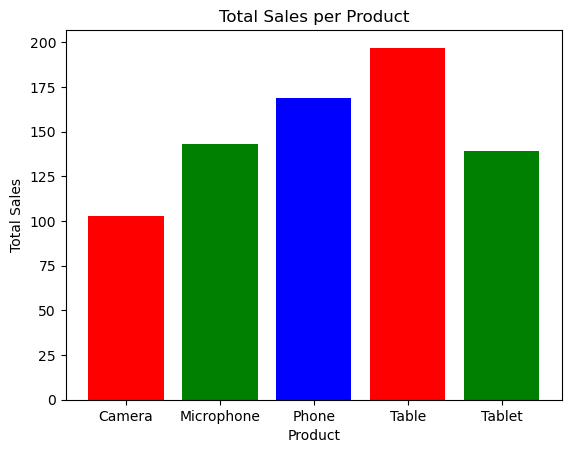

In [45]:
plt.bar(product_sales.index, product_sales.values, color=['red', 'green', 'blue'])
plt.title('Total Sales per Product')
plt.xlabel('Product')
plt.ylabel('Total Sales')
plt.show()

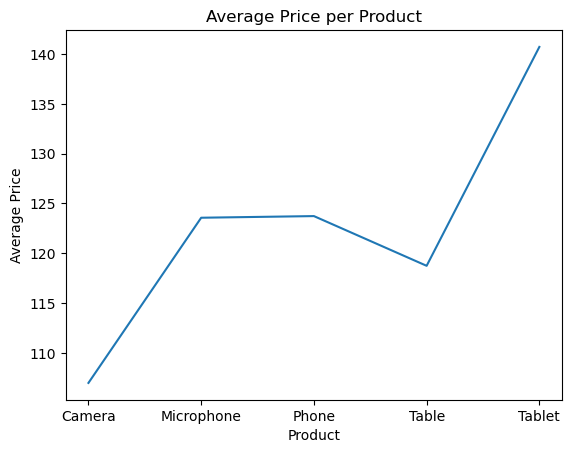

In [46]:
plt.plot(average_price.index, average_price.values)
plt.title('Average Price per Product')
plt.xlabel('Product')
plt.ylabel('Average Price')
plt.show()